# 라이브러리 불러오기

In [2]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import seaborn as sns
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

## 한글 폰트 적용

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

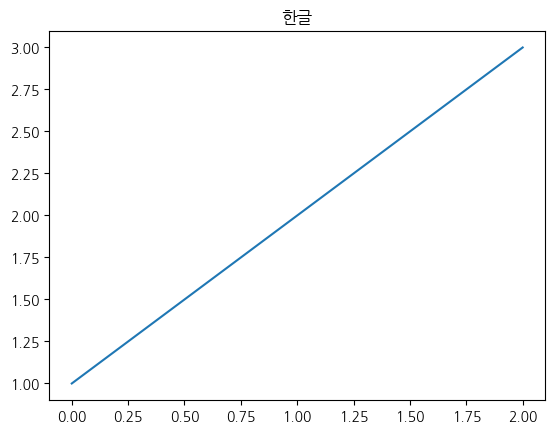

In [4]:
plt.rcParams['font.family'] = 'NanumGothic' # 나눔바른고딕 적용하기
plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

## 구글드라이브 연동

In [5]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## 데이터 파일 불러오기(csv)

In [11]:
# 데이터 로드
DATA_PATH = '/content/drive/MyDrive/세미 프로젝트/서울교통공사_역별시간대별혼잡도_20221231 (2).csv'
data = pd.read_csv(DATA_PATH, encoding='euc-kr')

### 1~8호선 데이터 프레임

In [12]:
# 필터 적용
filtered_data = data[data['호선'].between(1, 8)]

# 필터링된 데이터프레임 출력
print(filtered_data)

        연번 요일구분  호선   역번호  출발역 상하구분  5시30분  6시00분  6시30분  7시00분  ...  20시00분  \
0        1   평일   1   150  서울역   상선    7.3   18.1   18.1   30.9  ...    15.6   
1        2   평일   1   150  서울역   하선   11.5   11.0   13.2   21.4  ...    35.3   
2        3   평일   1   151   시청   상선    6.6   15.4   14.7   25.0  ...    19.1   
3        4   평일   1   151   시청   하선    9.0    9.1   14.6   20.0  ...    30.5   
4        5   평일   1   152   종각   상선    6.3   14.4   10.7   17.6  ...    26.8   
...    ...  ...  ..   ...  ...  ...    ...    ...    ...    ...  ...     ...   
1653  1654  공휴일   8  2827   모란   하선    0.0    0.0    0.0    0.0  ...     0.0   
1654  1655  공휴일   8  2828  남위례   상선    9.9    5.8    6.6    8.1  ...     7.3   
1655  1656  공휴일   8  2828  남위례   하선    2.1    3.0    3.7    3.0  ...    17.1   
1656  1657  공휴일   8  2828  남위례   상선    9.9    5.8    6.6    8.1  ...     7.3   
1657  1658  공휴일   8  2828  남위례   하선    2.1    3.0    3.7    3.0  ...    17.1   

      20시30분  21시00분  21시30분  22시00분  2

### 컬럼 삭제

In [13]:
# '연번' 컬럼 삭제
data.drop('연번', axis=1, inplace=True)

# 수정된 데이터프레임 출력
print(data)

     요일구분  호선   역번호  출발역 상하구분  5시30분  6시00분  6시30분  7시00분  7시30분  ...  20시00분  \
0      평일   1   150  서울역   상선    7.3   18.1   18.1   30.9   56.6  ...    15.6   
1      평일   1   150  서울역   하선   11.5   11.0   13.2   21.4   38.0  ...    35.3   
2      평일   1   151   시청   상선    6.6   15.4   14.7   25.0   42.4  ...    19.1   
3      평일   1   151   시청   하선    9.0    9.1   14.6   20.0   35.4  ...    30.5   
4      평일   1   152   종각   상선    6.3   14.4   10.7   17.6   26.7  ...    26.8   
...   ...  ..   ...  ...  ...    ...    ...    ...    ...    ...  ...     ...   
1653  공휴일   8  2827   모란   하선    0.0    0.0    0.0    0.0    0.0  ...     0.0   
1654  공휴일   8  2828  남위례   상선    9.9    5.8    6.6    8.1   10.5  ...     7.3   
1655  공휴일   8  2828  남위례   하선    2.1    3.0    3.7    3.0    4.0  ...    17.1   
1656  공휴일   8  2828  남위례   상선    9.9    5.8    6.6    8.1   10.5  ...     7.3   
1657  공휴일   8  2828  남위례   하선    2.1    3.0    3.7    3.0    4.0  ...    17.1   

      20시30분  21시00분  21시30

# 시각화

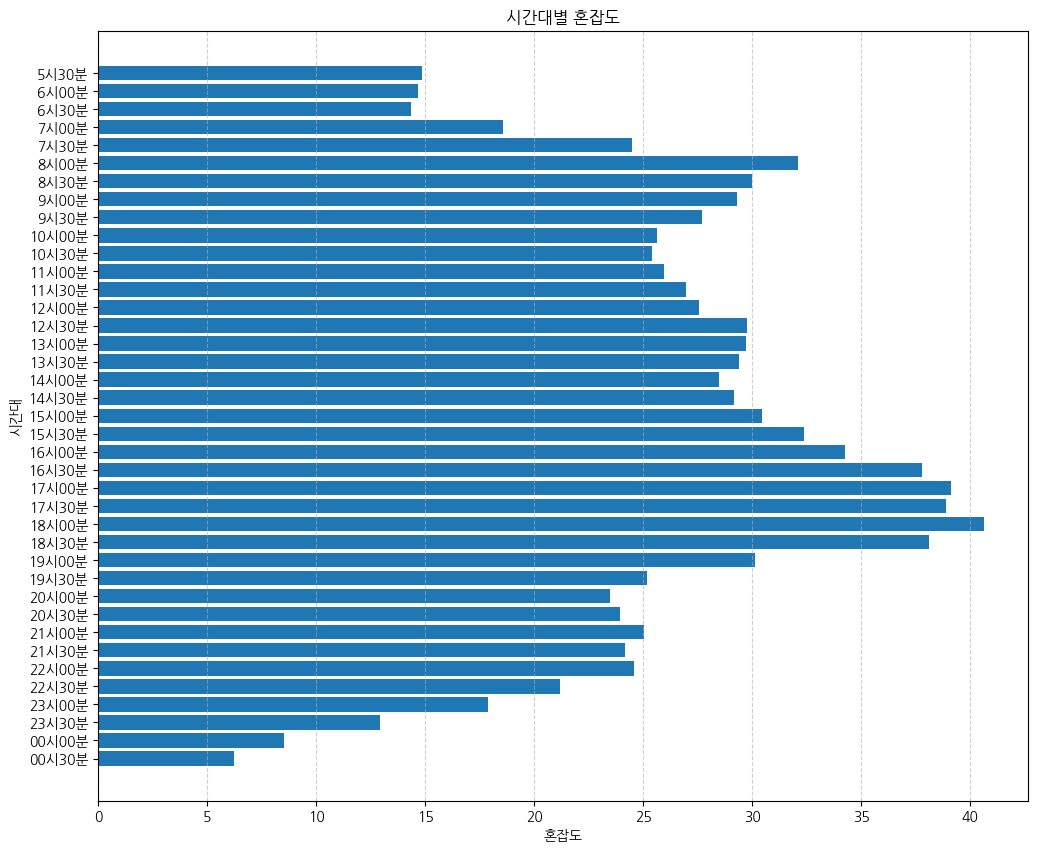

In [27]:
from datetime import datetime

# 시간대 문자열을 datetime 형식으로 변환
time_slots = ['5시30분', '6시00분', '6시30분', '7시00분', '7시30분', '8시00분', '8시30분', '9시00분', '9시30분', '10시00분', '10시30분',
              '11시00분', '11시30분', '12시00분', '12시30분', '13시00분', '13시30분', '14시00분', '14시30분', '15시00분', '15시30분',
              '16시00분', '16시30분', '17시00분', '17시30분', '18시00분', '18시30분', '19시00분', '19시30분', '20시00분', '20시30분',
              '21시00분', '21시30분', '22시00분', '22시30분', '23시00분', '23시30분', '00시00분', '00시30분']

# time_slots를 역순으로 정렬하여 5시30분이 제일 위에 오도록 함
time_slots.reverse()

# 혼잡도 데이터를 선택하고 시간대 순서로 정렬
congestion_data = data[time_slots]

# 가로 방향 막대 그래프 그리기
plt.figure(figsize=(12, 10))
plt.barh(time_slots, congestion_data.mean().values)
plt.xlabel('혼잡도')
plt.ylabel('시간대')
plt.title('시간대별 혼잡도')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# 그래프 표시
plt.show()